In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7a-base_from_m6c_BASELINE1',geometry="toroidal",
                   gridfilepath = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-08_MAST-U_2D_transients/Mike_base_case/mu1af3-fix_power.nc')

/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

In [4]:
print(ds.data_vars)

Data variables:
    Bxy                 (x, theta) float64 dask.array<chunksize=(20, 5), meta=np.ndarray>
    Dnnd                (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed+_iz              (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed+_rec             (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed_pump             (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed_target_recycle   (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed_target_refl      (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed_wall_recycle     (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Ed_wall_refl        (t, x, theta, zeta) float64 dask.array<chunksize=(23, 20, 5, 1), meta=np.ndarray>
    Edd+_cx             (t, x, theta, zeta) fl

In [5]:
db = CaseDB()

toload = [ 
    dict(name="mast-u_case", id = "Mike_base_case", unnormalise_geom = True, use_xhermes = True, squash = True),
    # dict(name="hotneut_AFN", id="hn4d-hnthresh_0_widev2_AFN", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="hotneut_AFN_nopump", id="hn4e-hnthresh_0_widev2_AFN_nopump", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)

KeyError: 'Mike_base_case'

In [ ]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/2024-08_MAST-U_2D_transients/Mike_base_case', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/grids')

case = db.load_case_2D("Mike_base_case", use_squash = True, verbose = True).isel(t=-1)


params = ['Te']

l_te = get_1d_poloidal_data(case.ds, params = params, region = ('outer_lower'), sepadd = 1)

# lcon = get_1d_poloidal_data(db, params = params, region = ('outer_lower'), sepadd = 1)

- Reading case Mike_base_case
-----------------------
- Looking for squash file
- Squash file found. squash date 12/11/2024, 17:59:22, dmp file date 12/10/2024, 14:06:43

Unnormalising with xHermes
None 1


ValueError: Length of values (655) does not match length of index (31)

In [ ]:
params = ['Te']
Lcon = get_1d_poloidal_data(ds, params = params, region = ('outer_lower'), sepadd = 1)

1 None


KeyError: 'nyg'

: 

In [6]:
case_db = CaseDB('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7a-base_from_m6c_BASELINE1')

print(case_db.grids)

[]


In [7]:
# print(ds.coords)
for var_name, data_array in ds.data_vars.items():
    print(f"Variable: {var_name}")
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    print("\n")  # Add a new line for better readability


Variable: Bxy


Variable: Dnnd


Variable: Ed+_iz


Variable: Ed+_rec


Variable: Ed_pump


Variable: Ed_target_recycle


Variable: Ed_target_refl


Variable: Ed_wall_recycle


Variable: Ed_wall_refl


Variable: Edd+_cx


Variable: Fd+_iz


Variable: Fd+_rec


Variable: Fdd+_cx


Variable: G1


Variable: G2


Variable: G3


Variable: J


Variable: Kd+_cond


Variable: Kd+d+_coll


Variable: Kd+e_coll


Variable: Kdd+_cx


Variable: Ke_cond


Variable: Ked+_coll


Variable: Kee_coll


Variable: NVd


Variable: NVd+


Variable: Nd


Variable: Nd+


Variable: Ne


Variable: Pd


Variable: Pd+


Variable: Pd+_src


Variable: Pd_src


Variable: Pe


Variable: Pe_src


Variable: Rc


Variable: Rd+_ex


Variable: Rd+_rec


Variable: SNVd


Variable: SNVd+


Variable: SNd


Variable: SNd+


Variable: SPd


Variable: SPd+


Variable: SPe


Variable: Sd+_iz


Variable: Sd+_rec


Variable: Sd+_src


Variable: Sd_pump


Variable: Sd_src


Variable: Sd_target_recycle


Variable: Sd_wall_recycle


V

In [8]:
limiter = pd.read_csv('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients/2_D/limiter_geom.csv')
print(limiter)


    Unnamed: 0      limR      limZ
0            0  1.564416  1.564235
1            1  1.732984  1.679020
2            2  1.348480  2.060413
3            3  1.088195  2.059460
4            4  0.902253  1.875653
..         ...       ...       ...
93          93  1.196317  1.580298
94          94  1.196222  1.580150
95          95  1.379892  1.572127
96          96  1.379991  1.572283
97          97  1.564416  1.564235

[98 rows x 3 columns]


/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

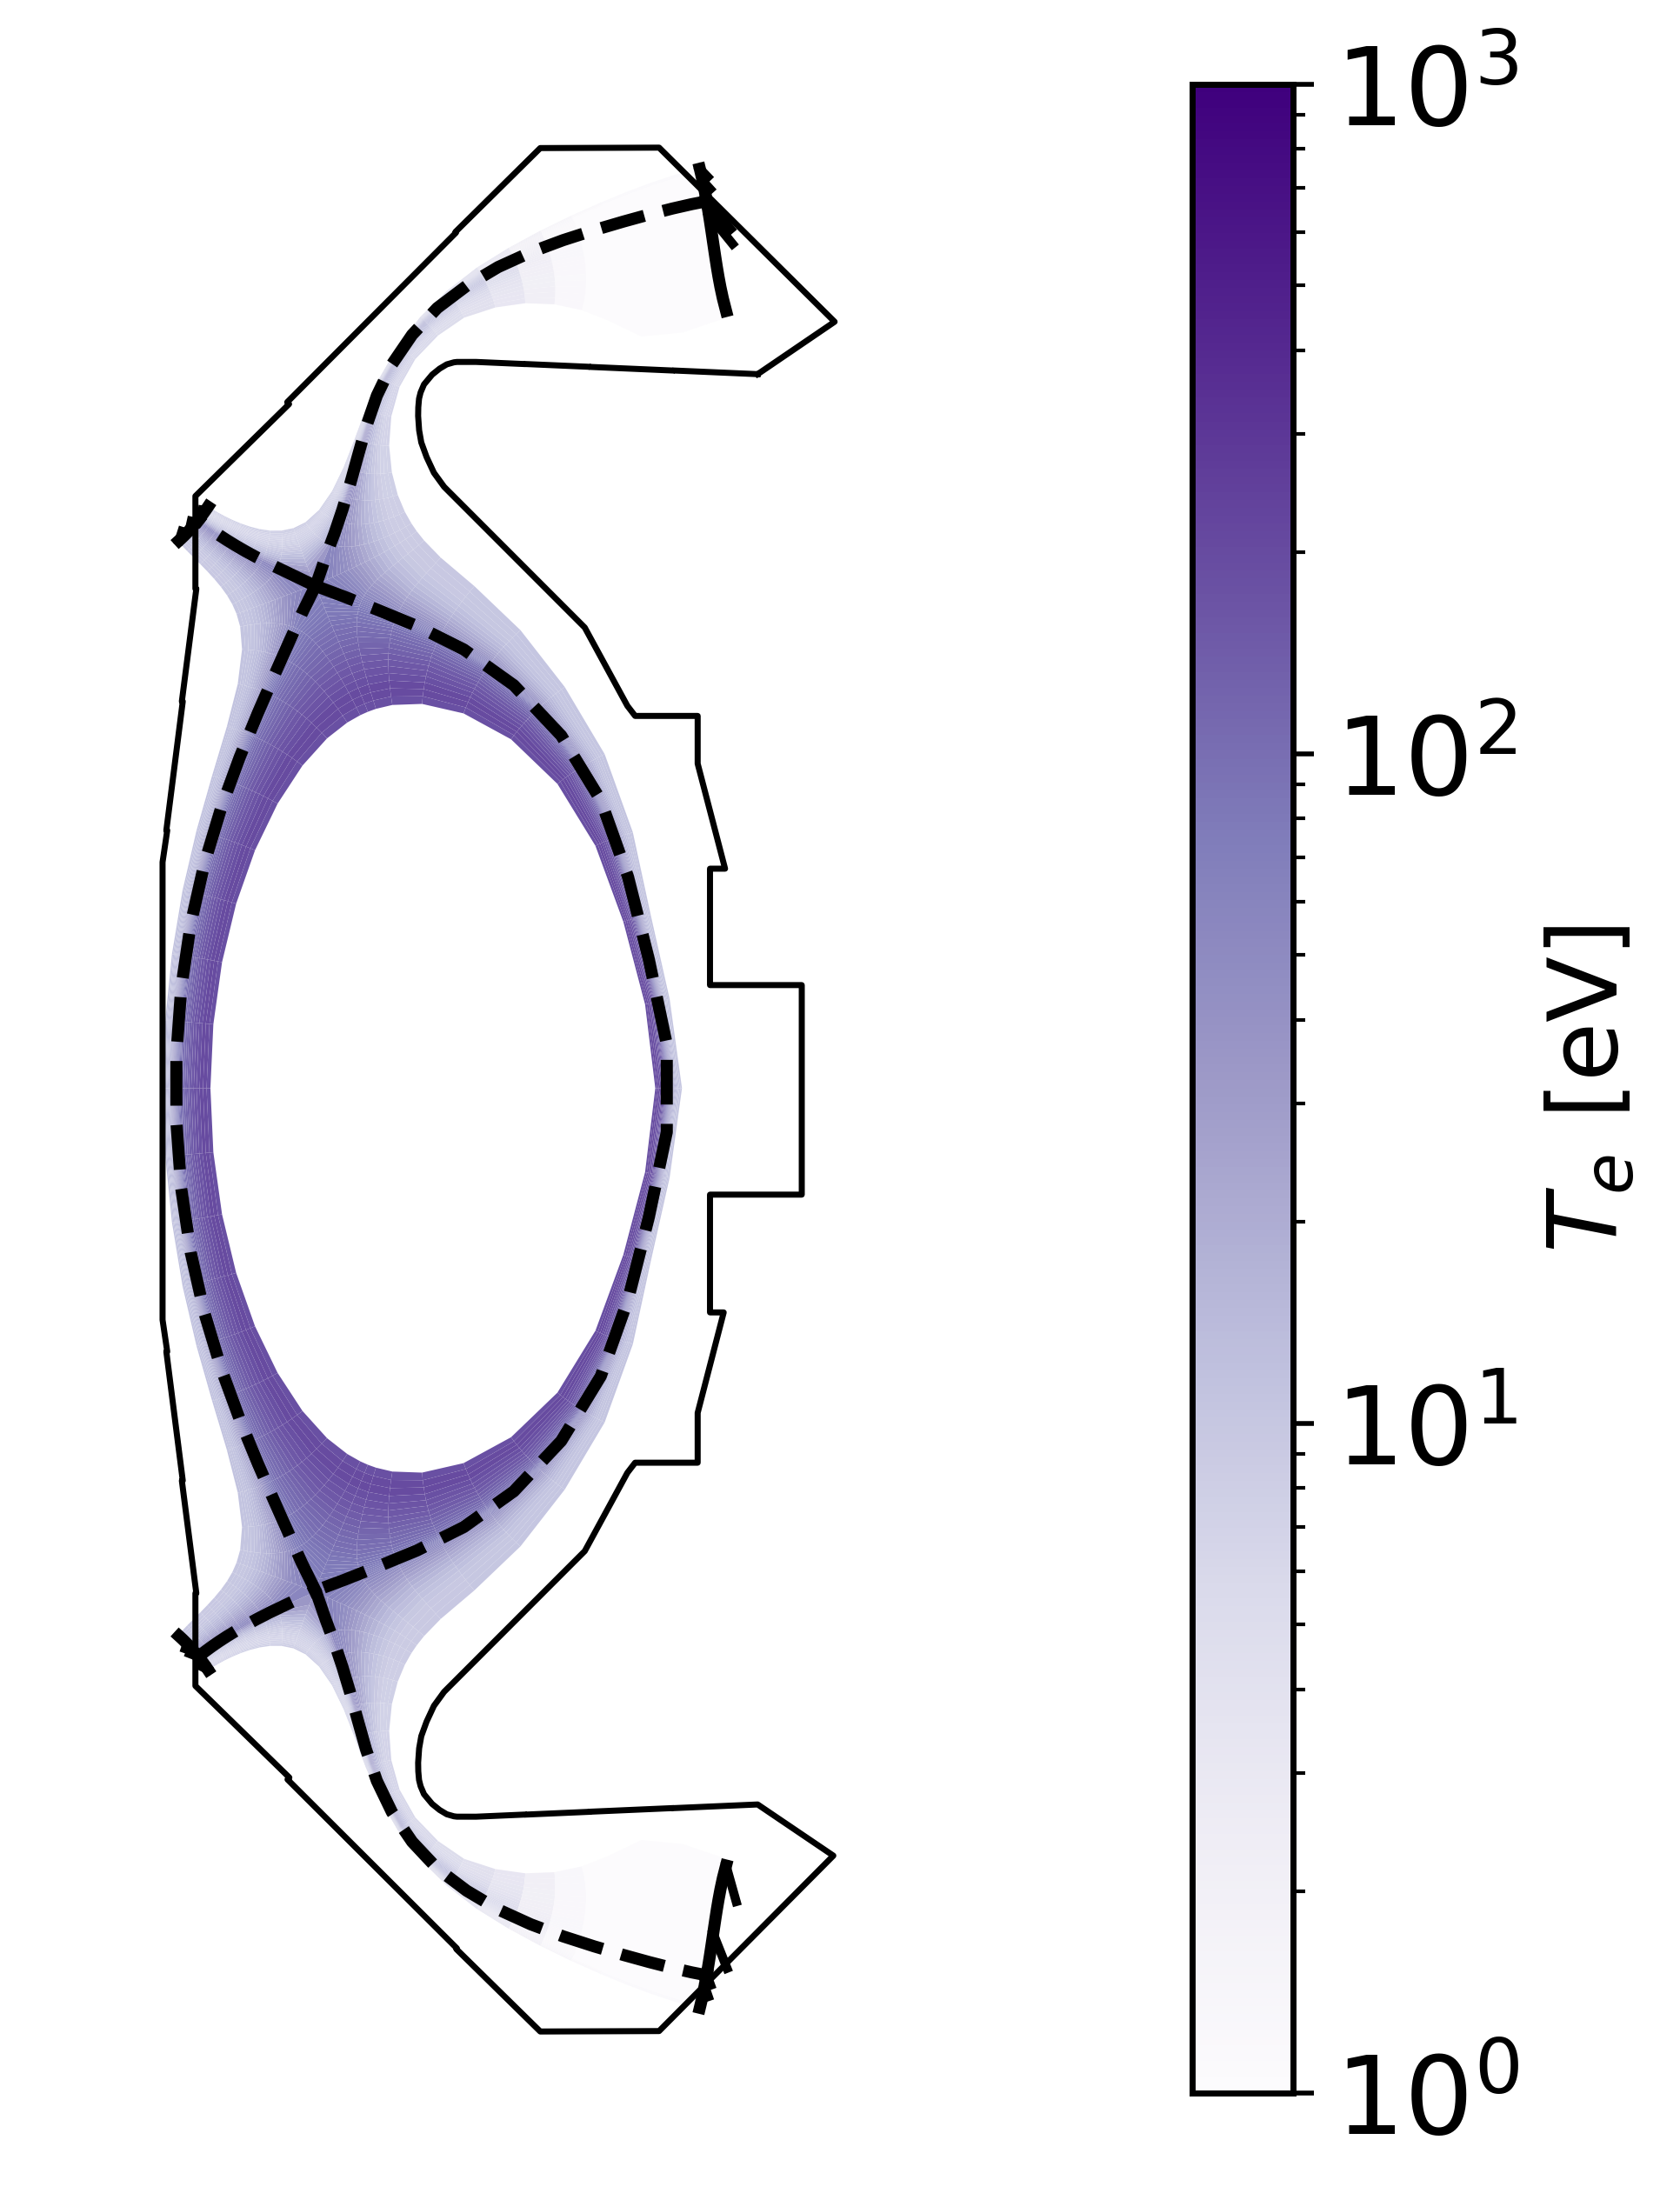

In [9]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6), dpi = 500)

vmin = 1
vmax = 1000

ds["Te"].isel(t=-1).hermesm.polygon(ax = ax, cmap = "Purples", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")
# ds['Td+'].isel(t=-1).hermesm.polygon(ax = ax[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{i}$ [eV]")
# ds['Ne'].isel(t=-1).hermesm.polygon(ax = ax[2], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{e}$ [$m^{-3}$]")
# ds['Nd'].isel(t=-1).hermesm.polygon(ax = ax[3], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{i}$ [$m^{-3}$]")
# Your existing plotting code here

# Adjust the spacing between subplots
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

# wspace adjusts the width between subplots
# hspace adjusts the height between subplots




ax.set_xlim(0, 2)
ax.set_ylim(-2.2,2.2)


ax.plot(limiter['limR'], limiter['limZ'], color = 'black', linewidth = 1)
plt.axis('off')
ax.set_title('')
plt.show()

# ax.set_title("Neutral temperature")
# ax.set_xlim(0.1, 0.85)
# ax.set_ylim(-0.9, 0.9)
# ax.grid(False)

/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

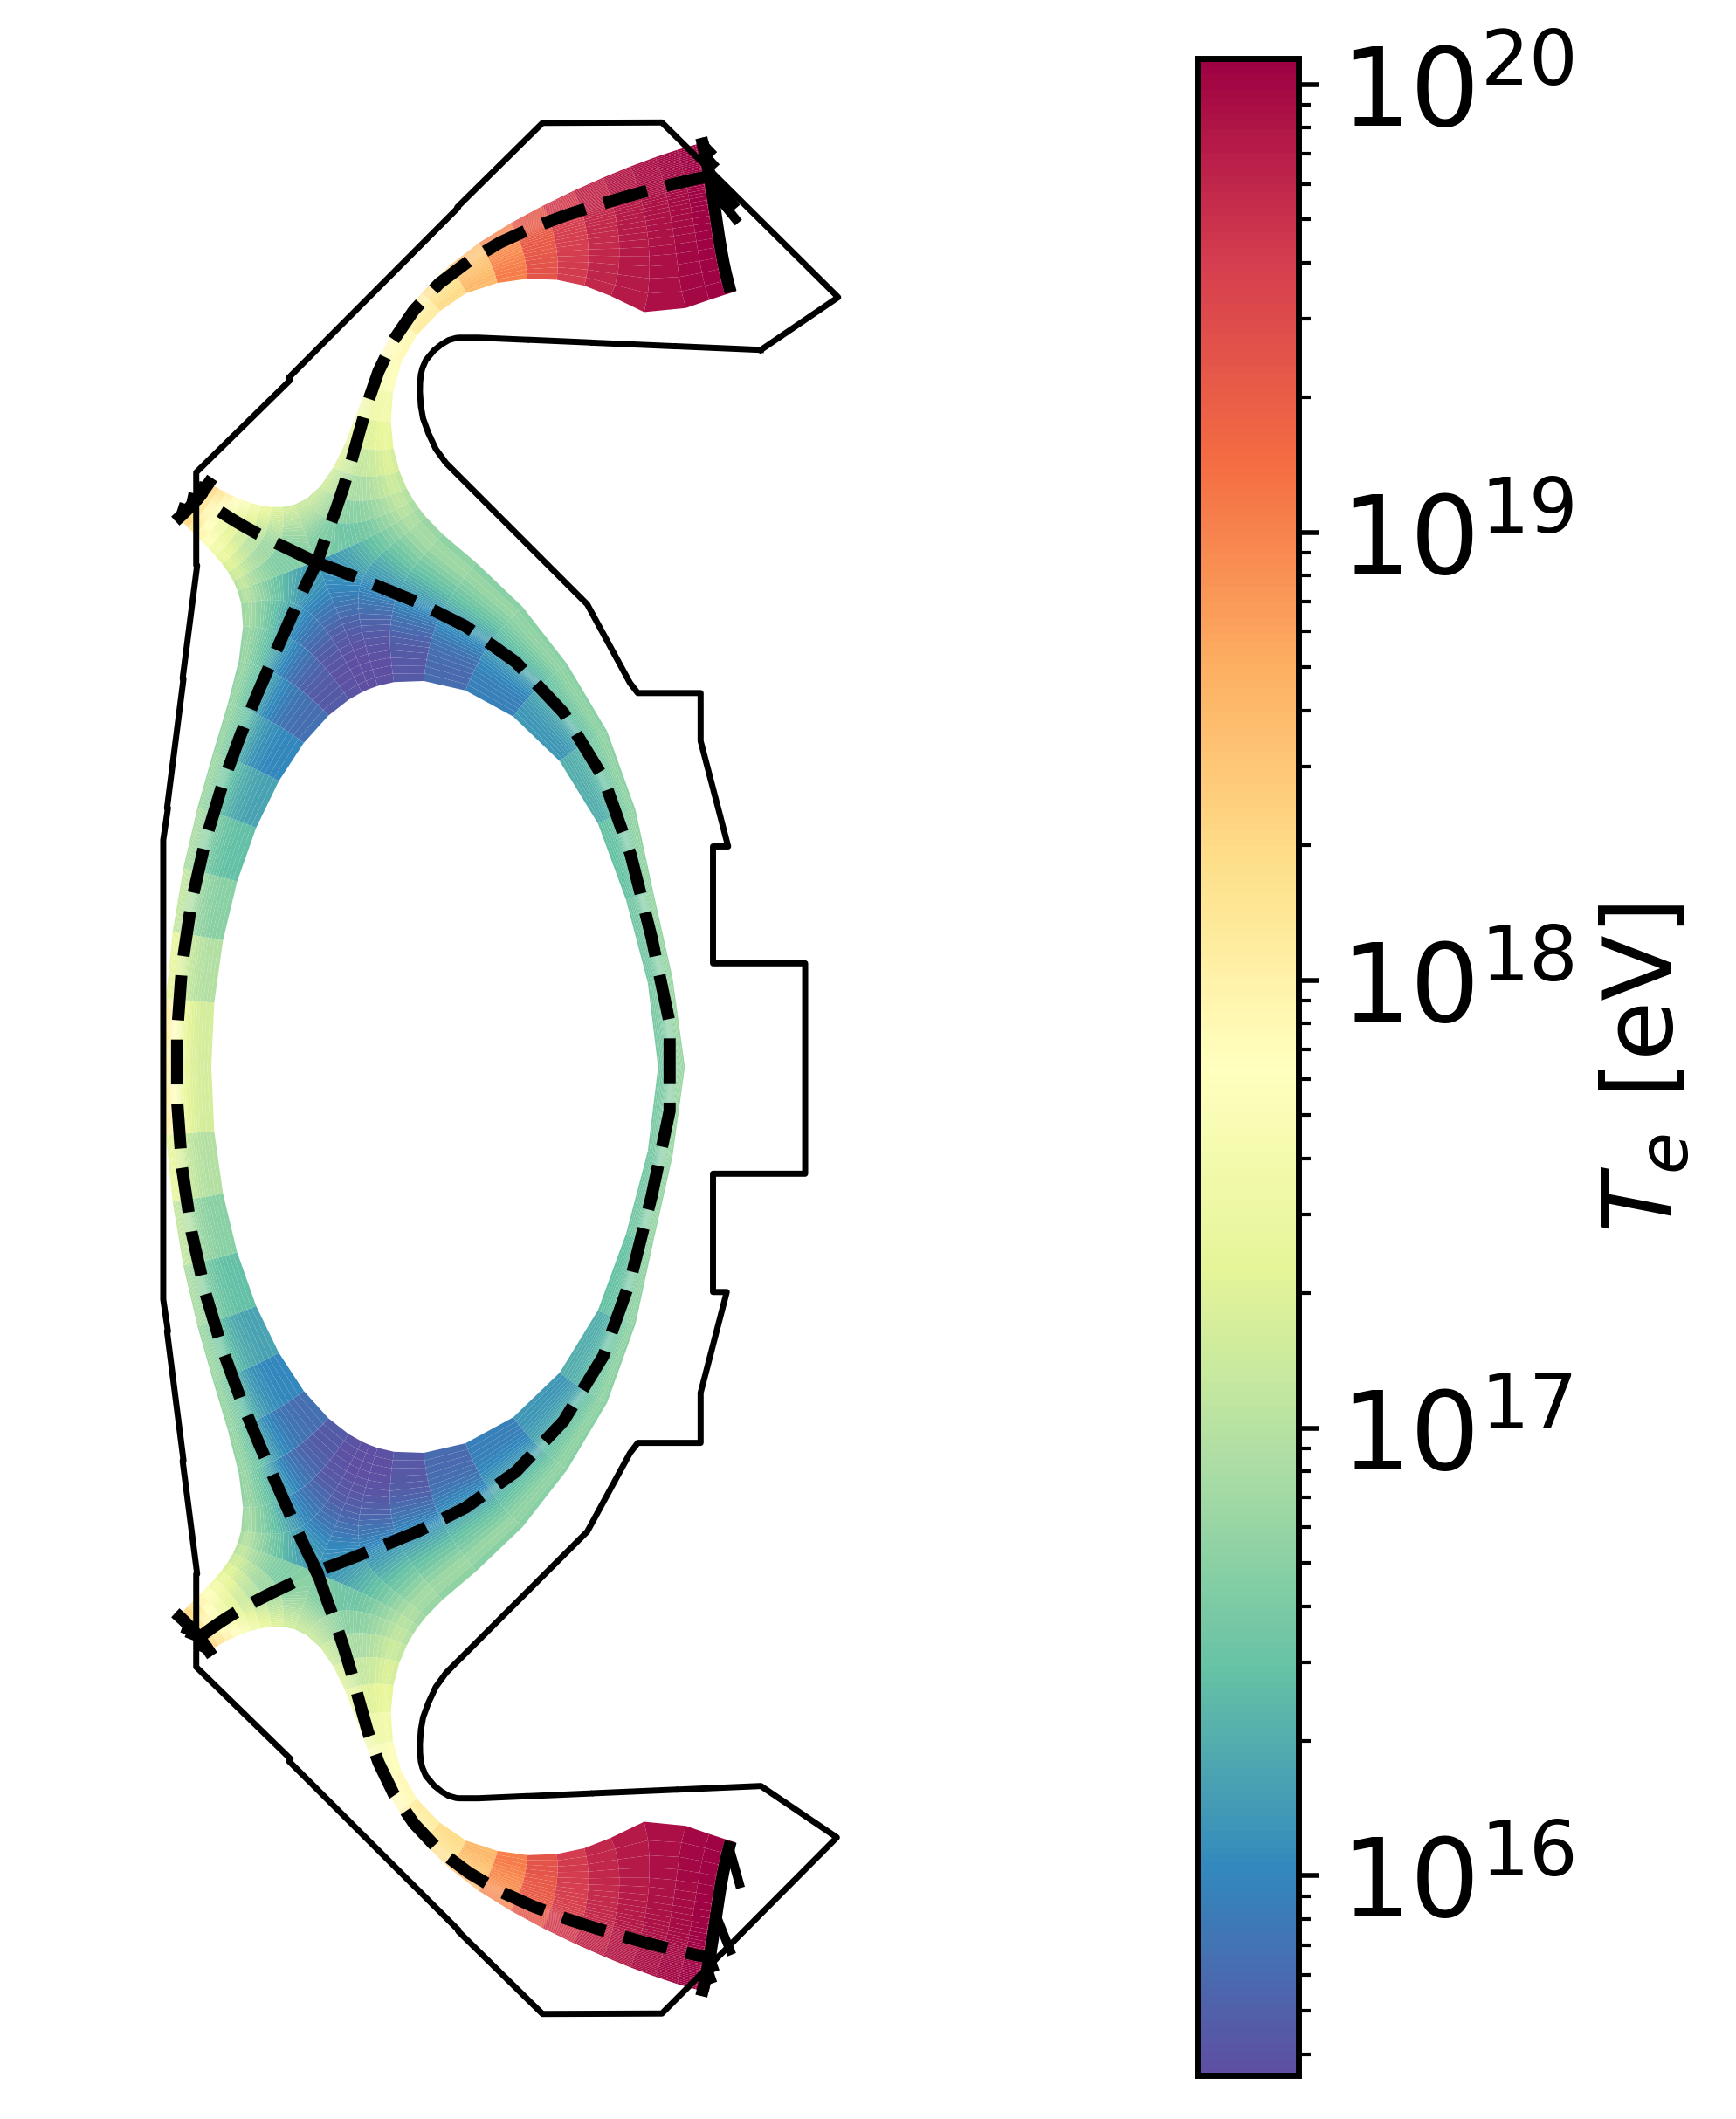

In [10]:
fig, ax = plt.subplots(1, 1, figsize = (14, 6), dpi = 500)

vmin = 1
vmax = 1000

ds["Nd"].isel(t=-1).hermesm.polygon(ax = ax, cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")
# ds['Td+'].isel(t=-1).hermesm.polygon(ax = ax[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{i}$ [eV]")
# ds['Ne'].isel(t=-1).hermesm.polygon(ax = ax[2], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{e}$ [$m^{-3}$]")
# ds['Nd'].isel(t=-1).hermesm.polygon(ax = ax[3], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{i}$ [$m^{-3}$]")
# Your existing plotting code here

# Adjust the spacing between subplots
# plt.subplots_adjust(wspace=0.5, hspace=0.5)

# wspace adjusts the width between subplots
# hspace adjusts the height between subplots




ax.set_xlim(0, 2)
ax.set_ylim(-2.2,2.2)


ax.plot(limiter['limR'], limiter['limZ'], color = 'black', linewidth = 1)
plt.axis('off')
ax.set_title('')
plt.show()

# ax.set_title("Neutral temperature")
# ax.set_xlim(0.1, 0.85)
# ax.set_ylim(-0.9, 0.9)
# ax.grid(False)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '')

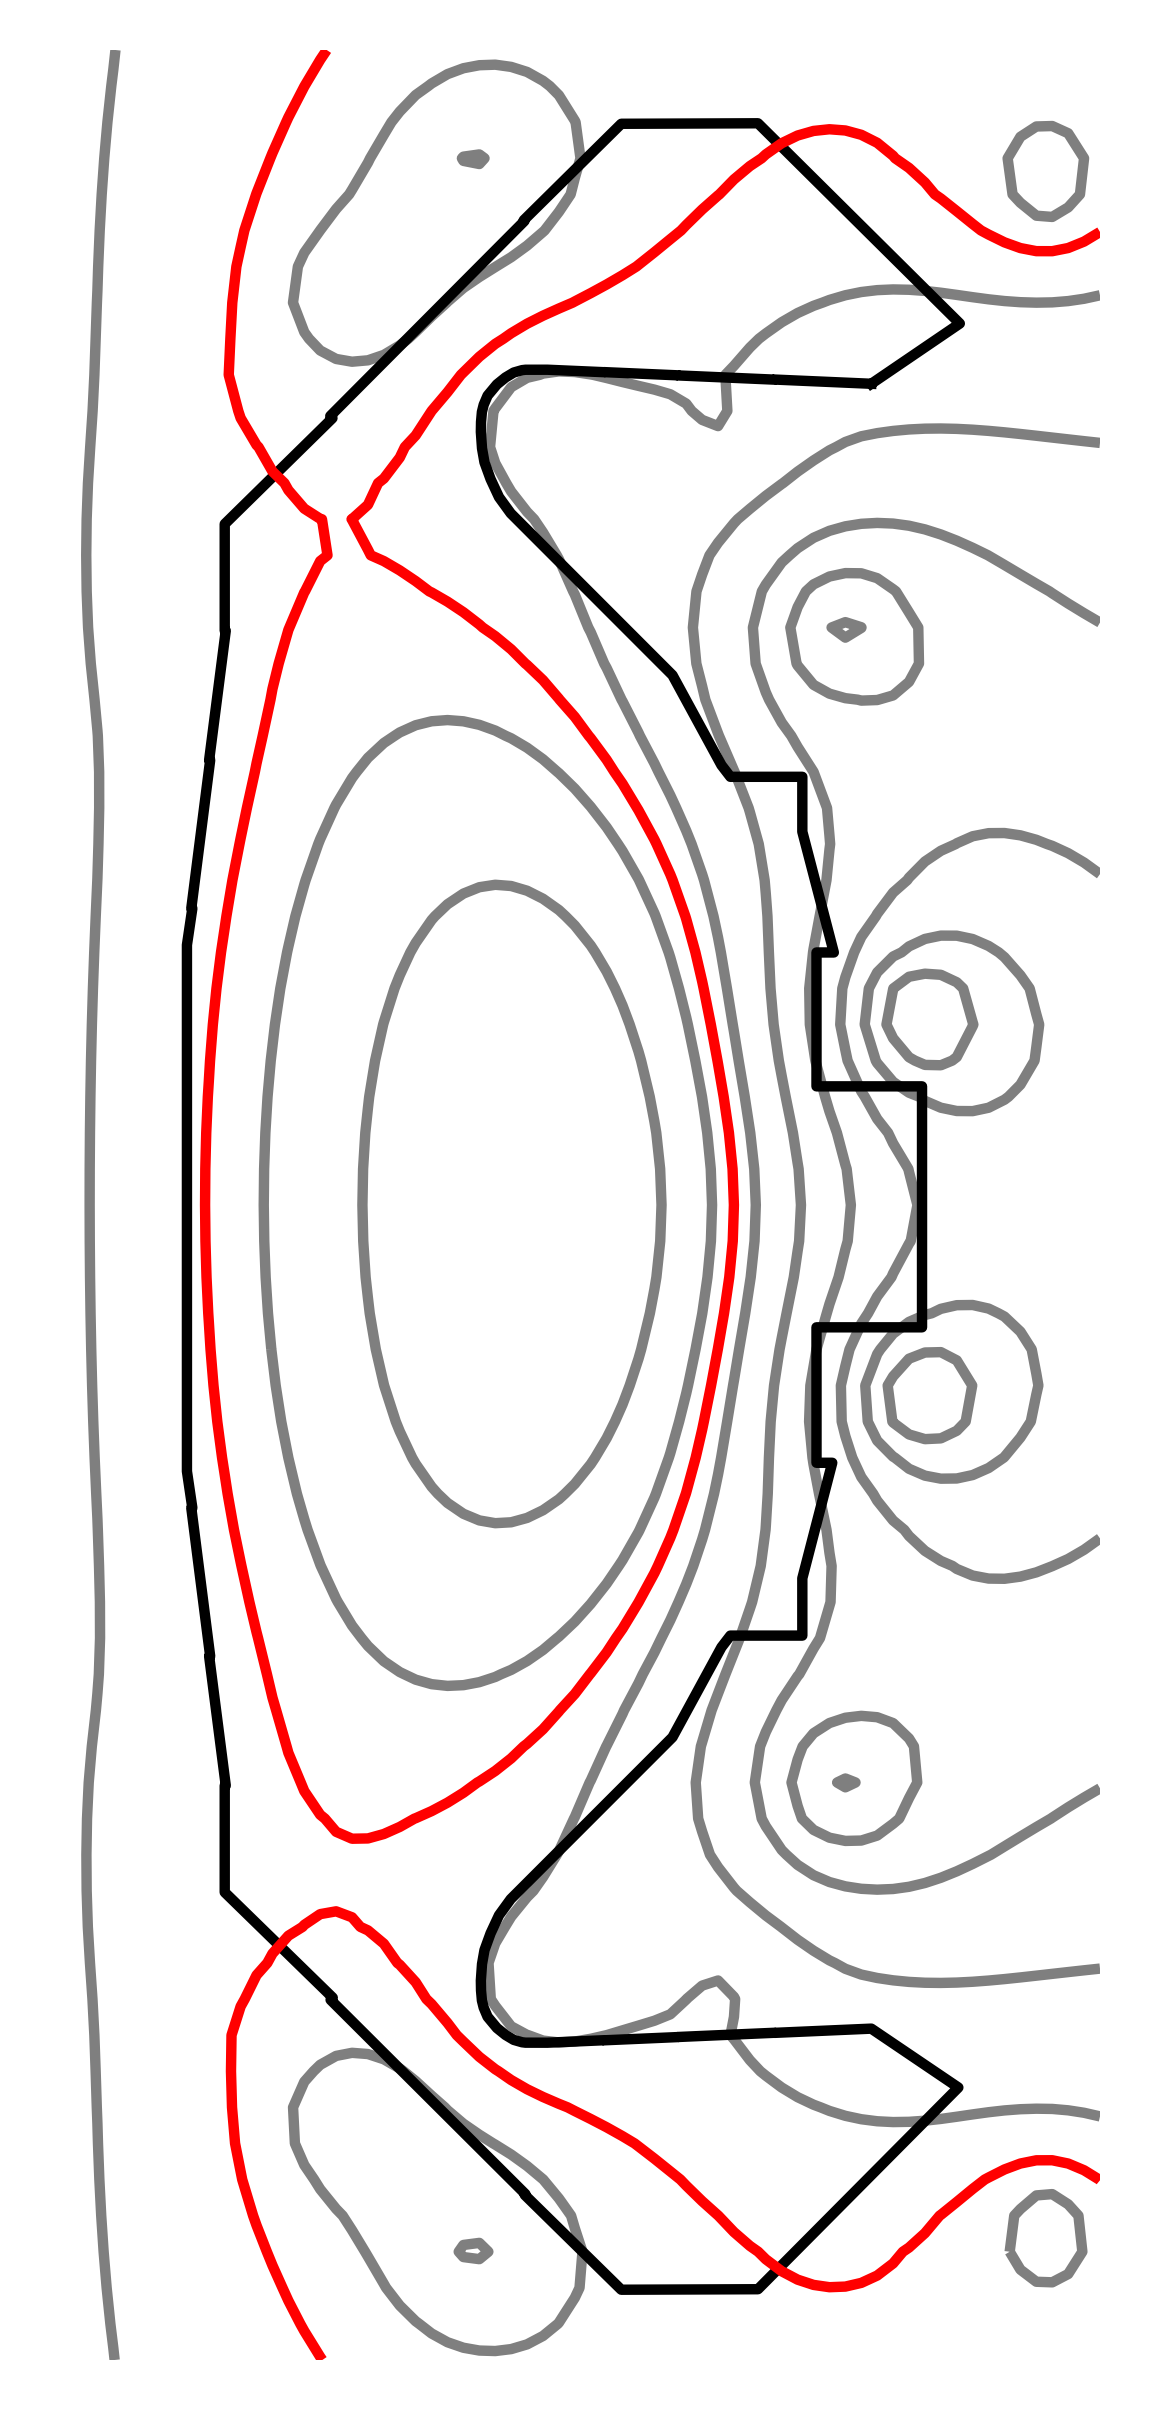

In [35]:
orthogonal = r"/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/mu1af3-fix_power.nc"
# nonorthog = r"C:\Users\Mike\OneDrive\Project\python-packages\Hypnotoad\integrated_tests\connected_doublenull_nonorthogonal\expected_nonorthogonal.grd.nc"


from hermes3.grid_fields import Mesh as sdMesh

fig, ax = plt.subplots(1,1, figsize = (14,6), dpi = 500)
# sdMesh(orthogonal).plot_rz_grid(ax = ax,plot_region_borders = False)

# ax = axes[1]
# sdMesh(nonorthog).plot_rz_grid(ax = ax)

# for ax in axes:
# eq.plotWall(axis = ax)
ax.grid(False)
ax.legend().set_visible(False)
ax.set_ylabel('')



# ax.set_xlim(0.2, 1.0)
# ax.set_ylim(-2.0, -1.0)

ax.plot(limiter['limR'], limiter['limZ'], color = 'black')


# Create the meshgrid for the plot
x = np.linspace(0.06, 2, 65)
y = np.linspace(-2.2, 2.2, 65)
Z, R = np.meshgrid(y, x)

psi_norm = np.loadtxt('/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients/2_D/shot-51364_psiNorm_data.txt',dtype=float, delimiter=',')

ax.contour(R, Z, psi_norm, levels=10, colors = 'black', alpha=0.5)
ax.contour(R, Z, psi_norm, levels=[1], colors = 'red')

plt.gca().set_aspect('equal', adjustable='box')

ax.set_xlim(0, 2)
ax.set_ylim(-2.2,2.2)

plt.xlabel('')
plt.ylabel('')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.axis('off')
ax.set_title('')

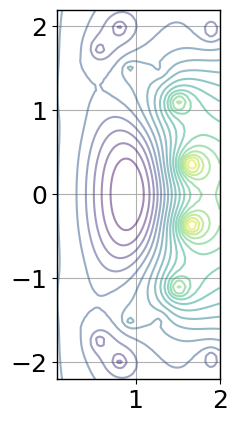

In [12]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases/m7a-base_from_m6c_BASELINE1', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/Mike_2D_cases')

case = db.load_case_2D("m7a-base_from_m6c_BASELINE1", use_squash = True, verbose = True)

case_2d_geom = case.ds.hermes.extract_2d_tokamak_geometry()

case_1d_fcx_on = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_on/corrected_fcx_on_high_density_4.8e18_start_floor_correction')

case_1d_fcx_on = case_1d_fcx_on.hermes.extract_1d_tokamak_geometry()

case_1d_fcx_off = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2025-01_STEP_1D-2D_comparison/03-01_production/sep_add_6/corrected_input_power_and_geometry_and_impurity/pulses/fcx_off/corrected_fcx_off_high_density_4.8e18_floor_correction_start_pulse')
case_1d_fcx_off = case_1d_fcx_off.hermes.extract_1d_tokamak_geometry()

- Reading case m7a-base_from_m6c_BASELINE1
-----------------------
- Looking for squash file
- Squash file found. squash date 02/26/2025, 18:53:30, dmp file date 02/26/2025, 18:29:29

Unnormalising with xHermes


6 None


/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/mnt/scratch/users/jlb647/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  comm

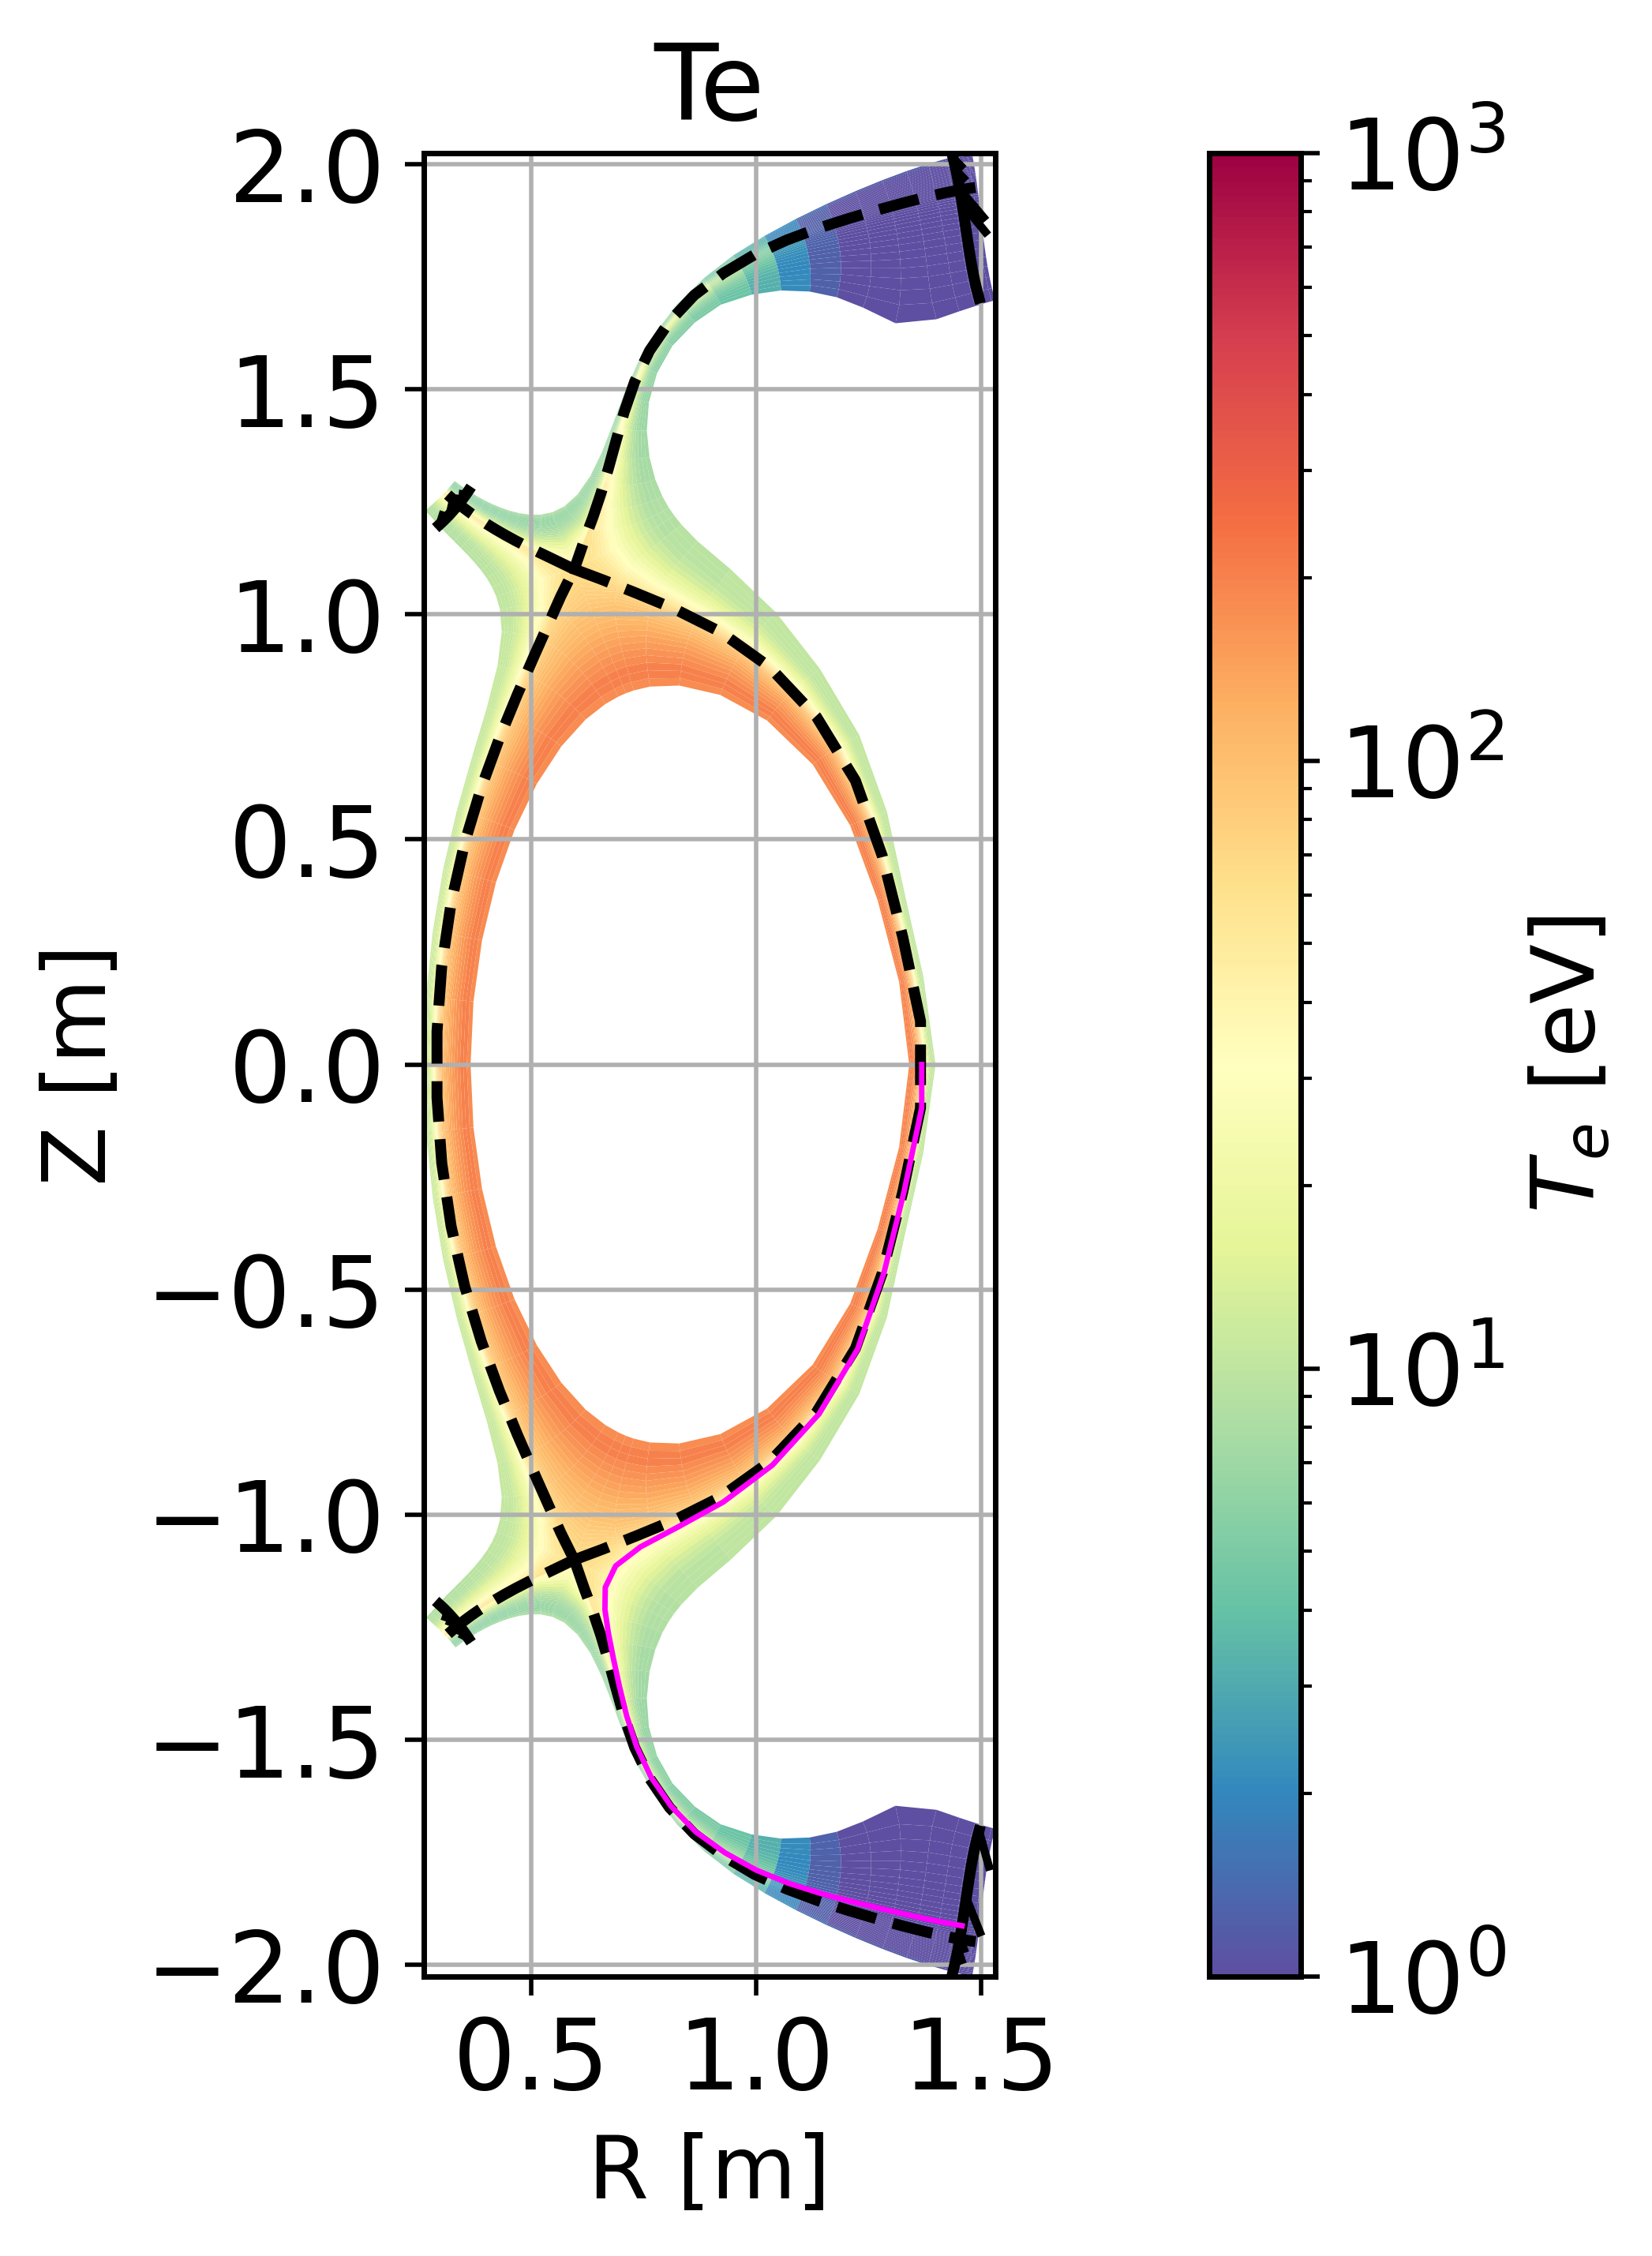

In [ ]:
profile = get_1d_poloidal_data(case_2d_geom.isel(t=-1), params = ['R', 'Z'], region = ('outer_lower'), sepadd = 6)

fig,ax = plt.subplots(1, 1, figsize = (14, 6), dpi = 500)

case_2d_geom["Te"].isel(t=-1).hermesm.polygon(ax = ax, cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")
# case_2d_geom['Ne'].isel(t=-1).hermesm.polygon(ax = ax, cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{e}$ [$m^{-3}$]")
ax.plot(profile['R'], profile['Z'], color = 'magenta', linewidth = 2, linestyle = '-')


# ax.annotate('', 
#             xy=(profile['R'].iloc[-1], profile['Z'].iloc[-1]), 
#             xytext=(profile['R'].iloc[-2], profile['Z'].iloc[-2]),
#             arrowprops=dict(facecolor='magenta', edgecolor='magenta', 
#                             arrowstyle="->", linewidth=7, mutation_scale=30))


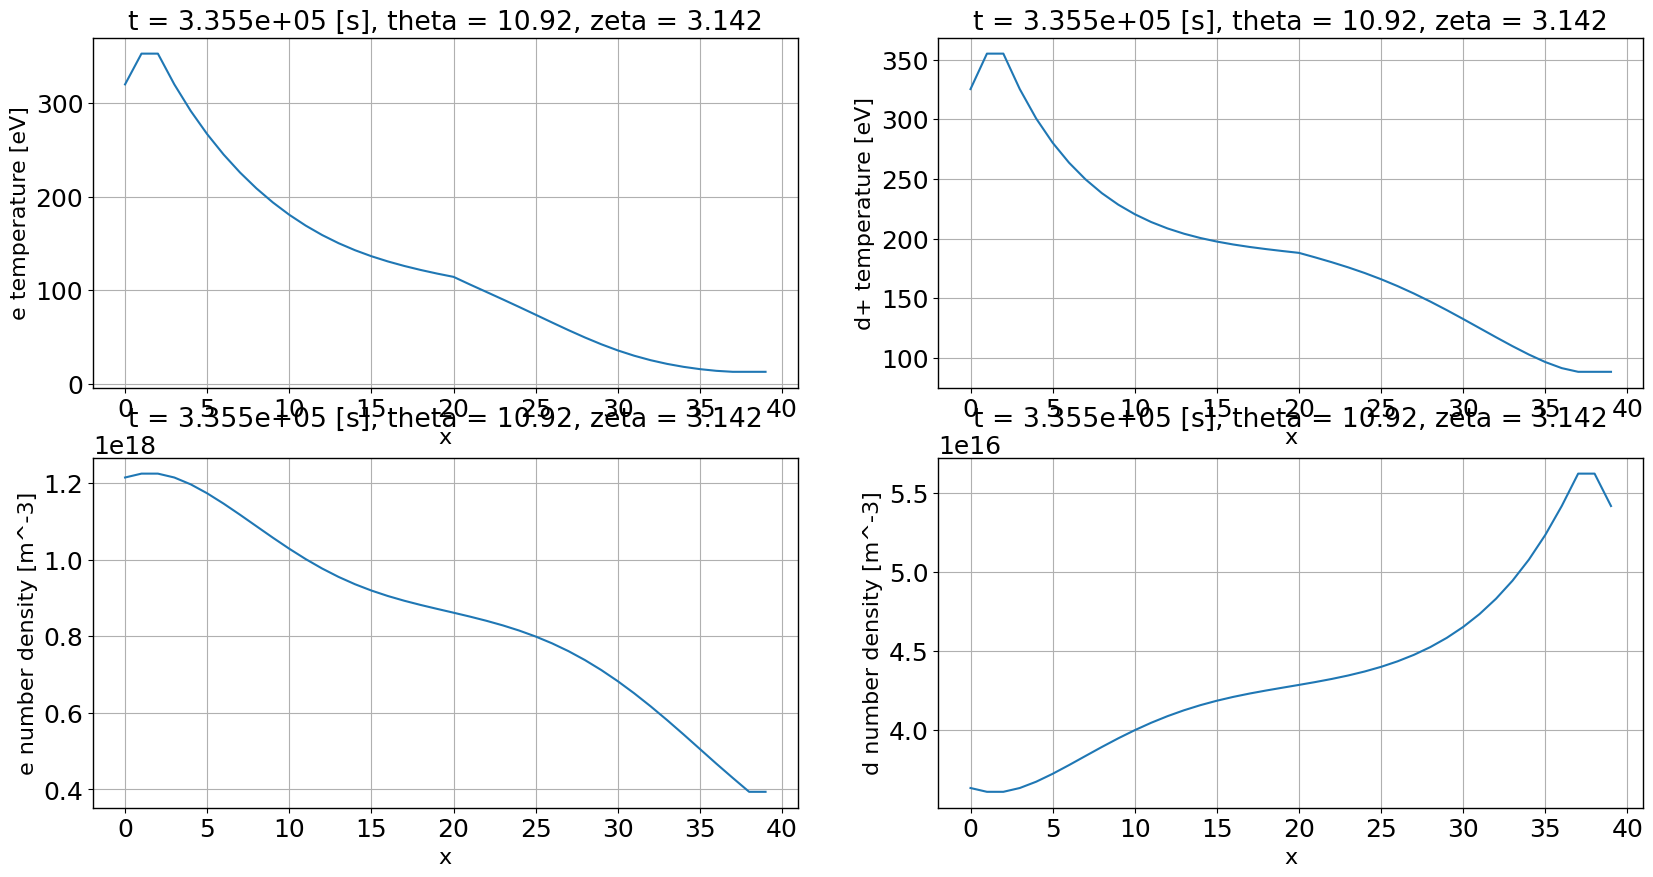

: 

In [ ]:
fig, ax = plt.subplots(2,2  , figsize=(20, 10))

ds['Te'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[0,0])

ds['Td+'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[0,1])

ds['Ne'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[1,0])

ds['Nd'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[1,1])